In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/intro_data_science/Project/Electric_Vehicle_Population_Data.csv')

In [6]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [7]:
data['Base MSRP'].value_counts()

,count
Base MSRP,
0.0,220717
69900.0,1315
31950.0,364
52900.0,218
32250.0,139
59900.0,121
54950.0,118
39995.0,117
36900.0,104


In [8]:
#imputing the values with zeros with median
# Calculate median excluding zero values
median_msrp = data.loc[data['Base MSRP'] != 0.0, 'Base MSRP'].median()

# Replace 0.0 with the median
data['Base MSRP'] = data['Base MSRP'].replace(0.0, median_msrp)

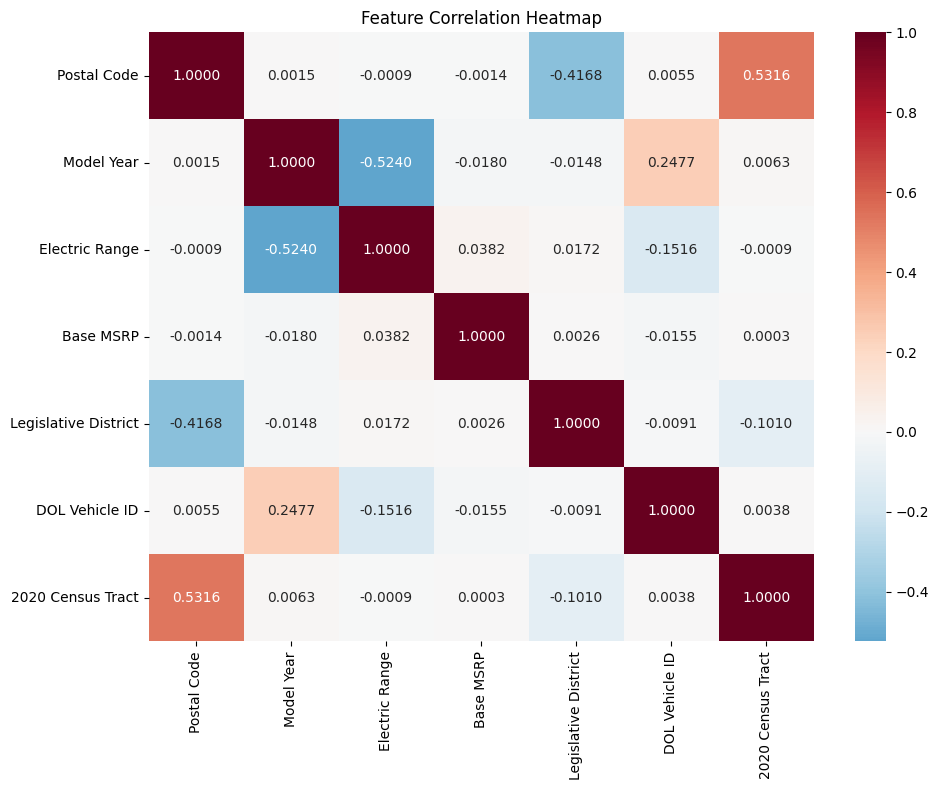

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your cleaned DataFrame
# If needed, replace with your actual DataFrame name (e.g., sample_data)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".4f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


## Correlation Features
  Feature | Correlation with Base MSRP | Interpretation
1. Electric Range | +0.038 | Very low positive correlation. May have a weak influence.
2. Model Year | -0.018 | Negligible negative correlation.
3. Postal Code | -0.0014 | No correlation. Just a location identifier.
4. Legislative District | +0.0026 | No meaningful correlation.
5. DOL Vehicle ID | -0.015 | Unique identifier – not useful for prediction.
6. 2020 Census Tract | +0.00025 | No correlation. Geographical identifier.

## Features to keep
- Electric Range:
Despite the low correlation, it has a direct logical relationship with price (vehicles with longer ranges usually cost more). Keep this for modeling and let the algorithm find any nonlinear relationships.

- Model Year:
Again, even with low correlation, newer cars tend to be priced higher. Retain this for modeling.

- Make/ Model:
Brand and model type influence price. Encode as categorical.

- Electric Vehicle Type
Distinguishes between BEV/PHEV which affects price.

## Features to drop
- VIN (1-10)	Unique ID – not predictive.
- Postal Code: Highly granular and doesn’t explain price. You could extract broader features from this (e.g., region or county) if needed.

- Legislative District:
Political boundary – doesn't carry predictive power for MSRP.

- DOL Vehicle ID: Unique identifier, adds no value to prediction.
- Vehicle Location	Likely duplicate or less useful version of geo fields.
- 2020 Census Tract: Like Postal Code – too granular and not informative on its own.
- State-  as all states include wa.

In [10]:
# List of columns to drop
columns_to_drop = [
    'VIN (1-10)',
    'City',
    'Postal Code',
    'Legislative District',
    'DOL Vehicle ID',
    'Vehicle Location',
    '2020 Census Tract',
    'Electric Utility'
]

# Drop the columns from the dataset
data = data.drop(columns=columns_to_drop, errors='ignore')

# Display the resulting dataframe structure
data.head()


,County,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Kitsap,WA,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,59900.0
1,Snohomish,WA,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,59900.0
2,King,WA,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,59900.0
3,King,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,59900.0
4,Yakima,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,59900.0


## NUll Values

In [11]:
data.isnull().sum()

,0
County,3
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,18
Base MSRP,18


In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()

,0
County,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
Base MSRP,0


## Outliers

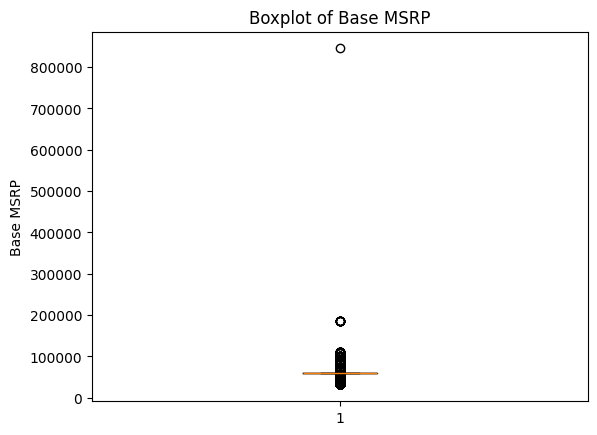

In [14]:
plt.boxplot(data['Base MSRP'])
plt.title('Boxplot of Base MSRP')
plt.ylabel('Base MSRP')
plt.show()


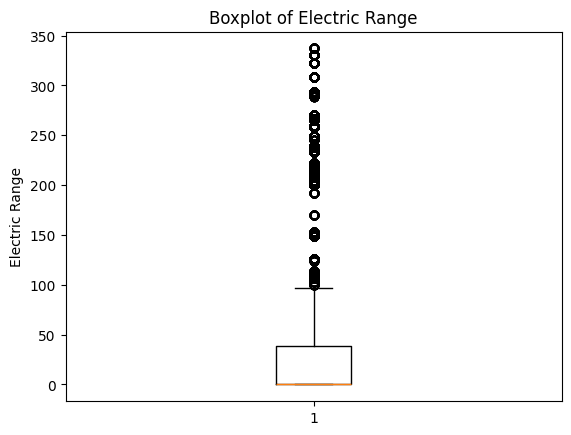

In [15]:
plt.boxplot(data['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.ylabel('Electric Range')
plt.show()

1. Base MSRP Boxplot Analysis Problem: The distribution has extreme high-value outliers. Notably:
One vehicle priced above $800,000

A few others above $200,000, which are outliers compared to the bulk of the data

The majority of values are tightly clustered under $100,000

This long upper tail suggests a right-skewed distribution

Implications: These high MSRP values will inflate the mean and potentially distort model training.

Linear regression models might give too much weight to these few high-priced vehicles.

In [16]:
#Removing extreme outliers
Q1 = data['Base MSRP'].quantile(0.25)
Q3 = data['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

data = data[data['Base MSRP'] <= upper_bound]

2. Electric Range Boxplot Analysis
- Problem:
- Many high-end outliers in electric range — several vehicles exceed 300 miles, - while the median range appears under 50 miles.

- Indicates a highly skewed distribution (possibly due to early EVs with low range vs. modern ones with high range)

- Implications:
Similar to MSRP, models may become biased or unstable due to these long-range vehicles.


In [17]:
#cap outliers
range_cap = data['Electric Range'].quantile(0.95)
data['Electric Range'] = data['Electric Range'].apply(lambda x: min(x, range_cap))

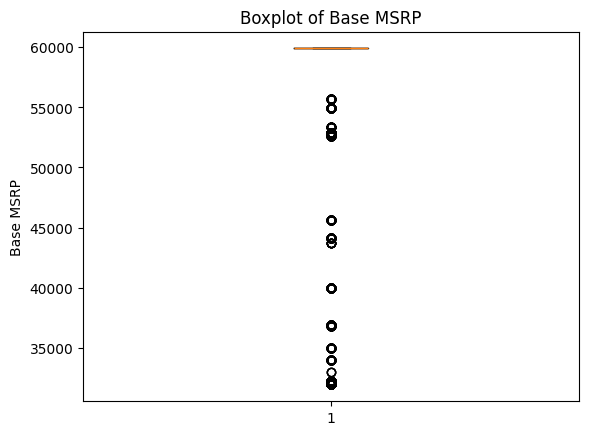

In [18]:
plt.boxplot(data['Base MSRP'])
plt.title('Boxplot of Base MSRP')
plt.ylabel('Base MSRP')
plt.show()


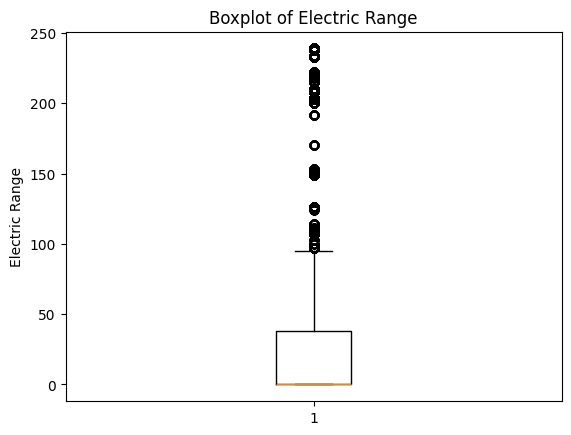

In [19]:
plt.boxplot(data['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.ylabel('Electric Range')
plt.show()


## After handling outliers:

- The extreme values are removed or capped, so the plots look more balanced.

- Base MSRP now ranges around $32,000–$60,000, a more realistic spread.

- Electric Range values are brought down to below ~250, reducing skew.

- The box and whiskers now show a more symmetric and cleaner distribution.

- Your model will now train on more consistent data, improving performance.

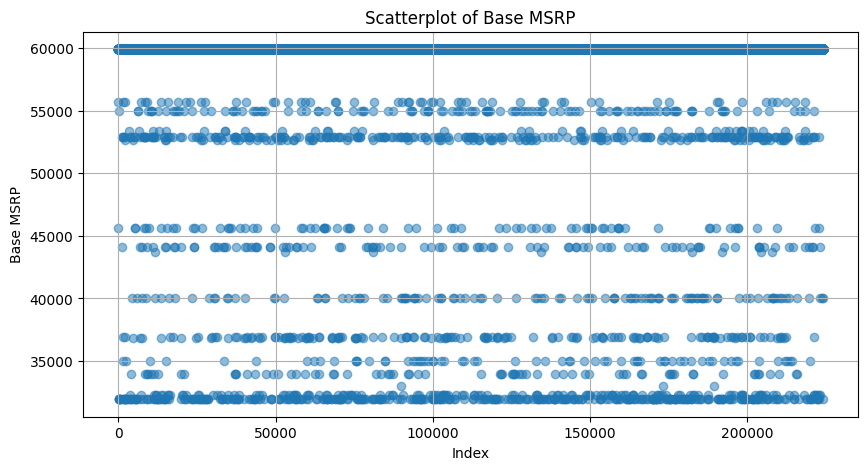

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(data.index, data['Base MSRP'], alpha=0.5)
plt.title('Scatterplot of Base MSRP')
plt.xlabel('Index')
plt.ylabel('Base MSRP')
plt.grid(True)
plt.show()

- have a large concentration of cars priced at fixed levels like 32K, 35K, 40K, 55K, 60K.

- These flat horizontal bands indicate standardized pricing, likely from a limited number of unique car models or trims.

- There's no continuous spread, but instead discrete price steps (common in vehicle datasets).

- After outlier removal, the prices are well-bounded, maxing out near $60,000 – which is good for modeling.

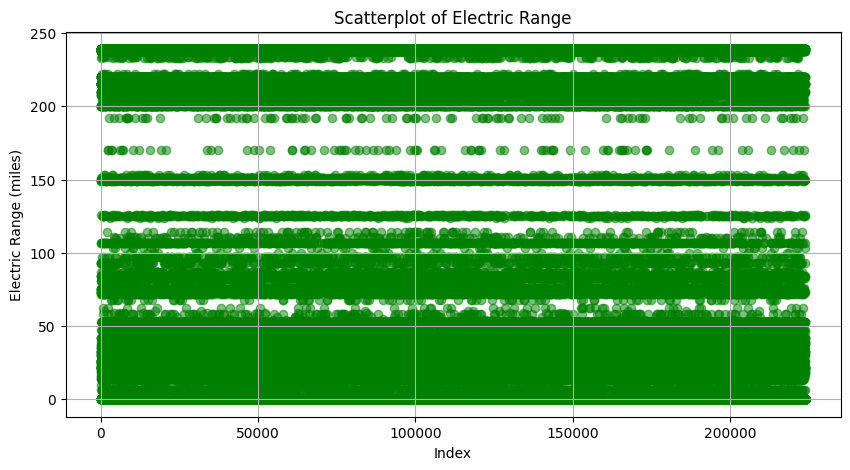

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(data.index, data['Electric Range'], alpha=0.5, color='green')
plt.title('Scatterplot of Electric Range')
plt.xlabel('Index')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

- Like MSRP, Electric Range is clustered at common values: 0, 50, 100, 150, 200, 250.

- Indicates fixed range values depending on model type, battery, or manufacturer.

- The green bands at set mileages suggest the range isn't a continuous variable but varies in tiers.



# Data Analysis and Visualisations:

<ipython-input-22-f0726f505a39>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes_sorted.values, y=top_makes_sorted.index, palette="viridis")


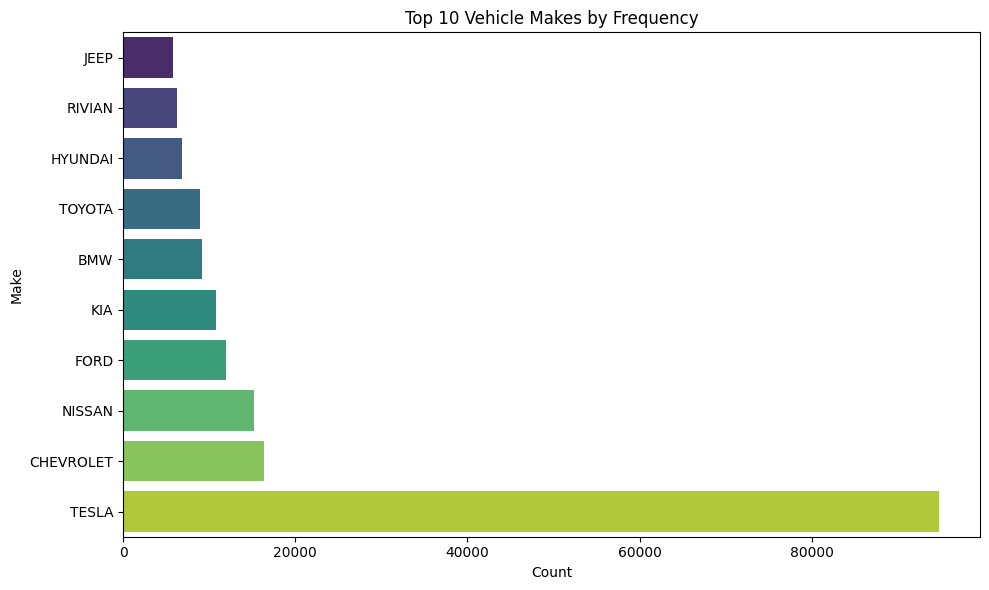

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Top 10 vehicle makes by frequency (sorted descending)
top_makes = data['Make'].value_counts().nlargest(10)
top_makes_sorted = top_makes.sort_values(ascending=True)  # sort for vertical barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes_sorted.values, y=top_makes_sorted.index, palette="viridis")
plt.title("Top 10 Vehicle Makes by Frequency")
plt.xlabel("Count")
plt.ylabel("Make")
plt.tight_layout()
plt.show()


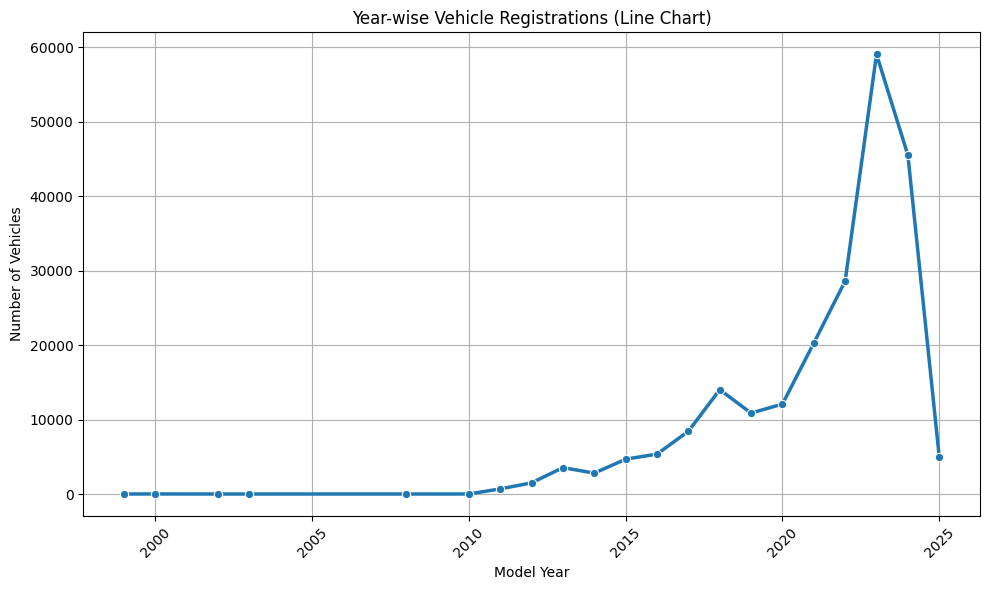

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of vehicles per model year
yearly_counts = data['Model Year'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2.5)
plt.title("Year-wise Vehicle Registrations (Line Chart)")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-24-e5c2a7c8dac4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Clean Alternative Fuel Vehicle (CAFV) Eligibility',


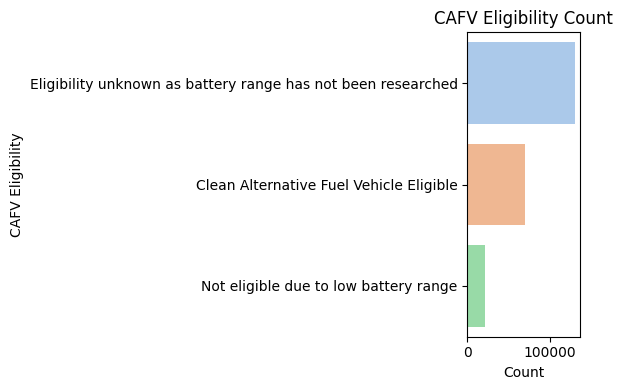

In [24]:

# 2. CAFV Eligibility (Yes/No) vs Count
plt.figure(figsize=(6, 4))
sns.countplot(data=data, y='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
              order=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index,
              palette="pastel")
plt.title("CAFV Eligibility Count")
plt.xlabel("Count")
plt.ylabel("CAFV Eligibility")
plt.tight_layout()
plt.show()

## Since regression model requires numeric input, convert categorical columns (like make, model, EV type) to numbers using onehot encoding

In [25]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [26]:
data.columns

Index(['County', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')

In [27]:
objectColumns = ['County','State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility'] #list of object columns
label_encoder = {}
for column in objectColumns:
    le=LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoder[column] = le

In [28]:
data.head()

,County,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,91,42,18,19,151,1,2,21.0,59900.0
1,174,42,14,8,18,0,0,238.0,59900.0
2,89,42,10,5,71,0,0,81.0,59900.0
3,89,42,14,39,89,0,0,220.0,59900.0
4,204,42,10,39,90,0,0,208.0,59900.0


## Normalise the dataset

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and 'Electric Range' is the column you want to scale

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the 'Electric Range' column
data['Electric Range'] = scaler.fit_transform(data[['Electric Range']])

# Now the 'Electric Range' column will have values scaled between 0 and 1

In [30]:
from sklearn.model_selection import train_test_split

# Define your target variable (y) and features (X)
y = data['Base MSRP']
X = data.drop('Base MSRP', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (177948, 8)
X_test shape: (44487, 8)
y_train shape: (177948,)
y_test shape: (44487,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2841576.0251509557
R-squared: 0.014322048880555105


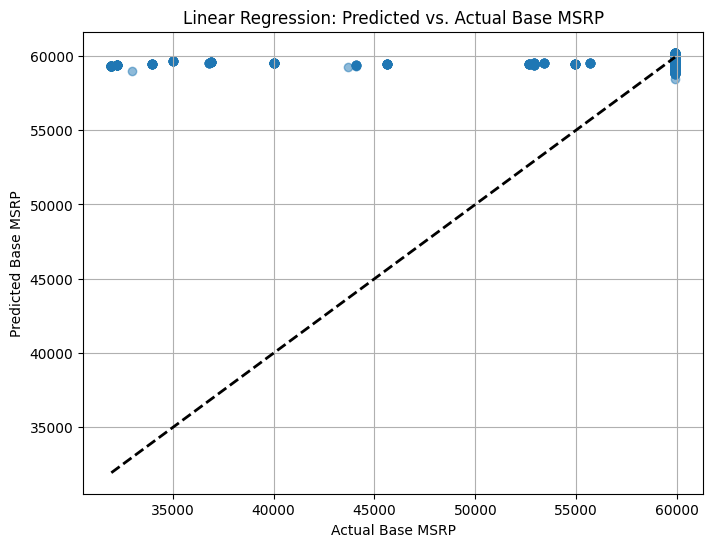

In [32]:
# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Base MSRP")
plt.ylabel("Predicted Base MSRP")
plt.title("Linear Regression: Predicted vs. Actual Base MSRP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.grid(True)
plt.show()


Decision Tree Regression:
Mean Squared Error: 73999.98205581005
R-squared: 0.9743310930096366


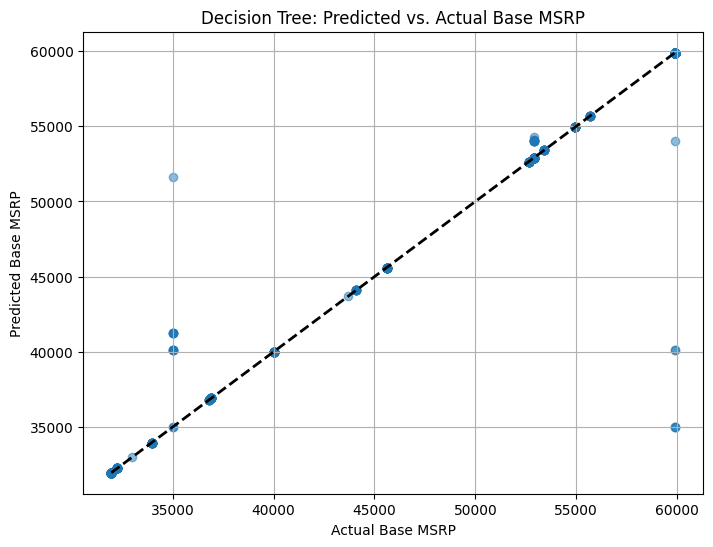

In [33]:

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a decision tree regression model
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model_dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

# Plot predicted vs. actual values for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel("Actual Base MSRP")
plt.ylabel("Predicted Base MSRP")
plt.title("Decision Tree: Predicted vs. Actual Base MSRP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

XGBoost Regression:
Mean Squared Error: 1269018.0184749356
R-squared: 0.55980657588861


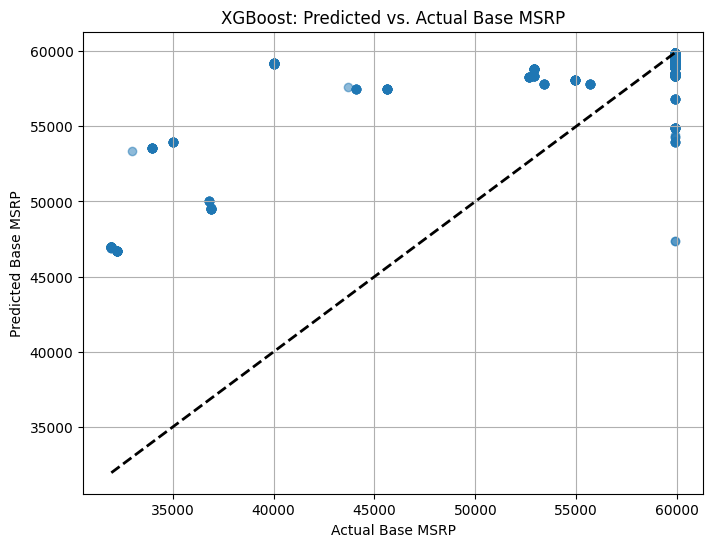

In [34]:
!pip install xgboost

import xgboost as xgb

# Create an XGBoost regressor
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model on the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

# Plot predicted vs. actual values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Base MSRP")
plt.ylabel("Predicted Base MSRP")
plt.title("XGBoost: Predicted vs. Actual Base MSRP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## Machine Learning Algorithms Used:
1. Linear Regression
- Models a straight-line relationship between features and target (Base MSRP).
- Works best when the data has a linear trend.
- Pros: Simple, fast, interpretable.
- Cons: Not good for nonlinear or tiered data like MSRP pricing steps.

2. Decision Tree Regressor
- A tree-based model that splits the data on feature values to minimize prediction error.
- Good for interpretable models and works well with nonlinear relationships.
- Pros: Low bias, easy to visualize.
- Cons: Can overfit on small variations if not pruned.

3. XGBoost Regressor
- An advanced ensemble method that builds multiple decision trees in sequence.
- Learns from errors and improves prediction in stages (gradient boosting).
- Pros: Handles complex data and nonlinear relationships, often gives best performance.
- Cons: Can overfit on small or noisy datasets if not tuned.


## Evaluation Metrics Explained
1. Mean Squared Error (MSE):
- It measures the average squared difference between predicted and actual values.
- Lower MSE = better model.
-Sensitive to large errors/outliers.

2. R- Squared
- Tells how well the model explains the variance in the data.
- R2 = 1 perfect fit
- R2 = 0 model does no better than the average


# Interpreting Results:
 ### Model : Linear Regression
- MSE : 2,841,576
- R square : 0.814
- Observations: Worse fit. Struggles with tiered pricing (horizontal prediction lines).
### Model : Decision Tree
- MSE: 73,999
- R square score: 0.974
- Observations: Very good fit. Predictions closely follow actual prices.
### Model : XGBoost
- MSE: 1260918
- R Square score : 0.559
- Observations: Overfitting or undertrained (due to low trees)

#  Predicted vs Actual
- Closer points are to the diagonal line, the better the model is.

- Linear model predicts averages → flattens results.
- Decision Tree is very close to the line → strong prediction accuracy.
- XGBoost likely needs tuning (increase estimators, tune depth).

# Conclusion
The Decision Tree model's predictions are very close to the actual MSRP values, as shown by:

A low error (MSE = 73,999), and

A high fit (R² = 0.974).

This means the model is doing a great job estimating car prices based on the features you selected.